__Based on:__ http://koaning.io/radial-basis-functions.html

__Link to the talk:__ https://www.youtube.com/watch?v=68ABAU_V8qI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.interpolate import Rbf
from functools import partial

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
def rbf(alpha, x, i):
    return np.exp(-1/alpha*pow(x-i,2))

alpha = 1
x = np.arange(0, 12, 0.01)
rbf_partial = partial(rbf, alpha, x)

In [3]:
rbfs = pd.DataFrame(list(map(rbf_partial, range(0,13))))
rbfs.index = rbfs.index.map(lambda x: 'r' + str(x))
rbfs = rbfs.transpose()

data = pd.DataFrame()
data['x'] = x
data['x_factored'] = list(map(lambda x: str(np.floor(x)), x))
data = pd.DataFrame.merge(data, rbfs, left_index=True, right_index=True)

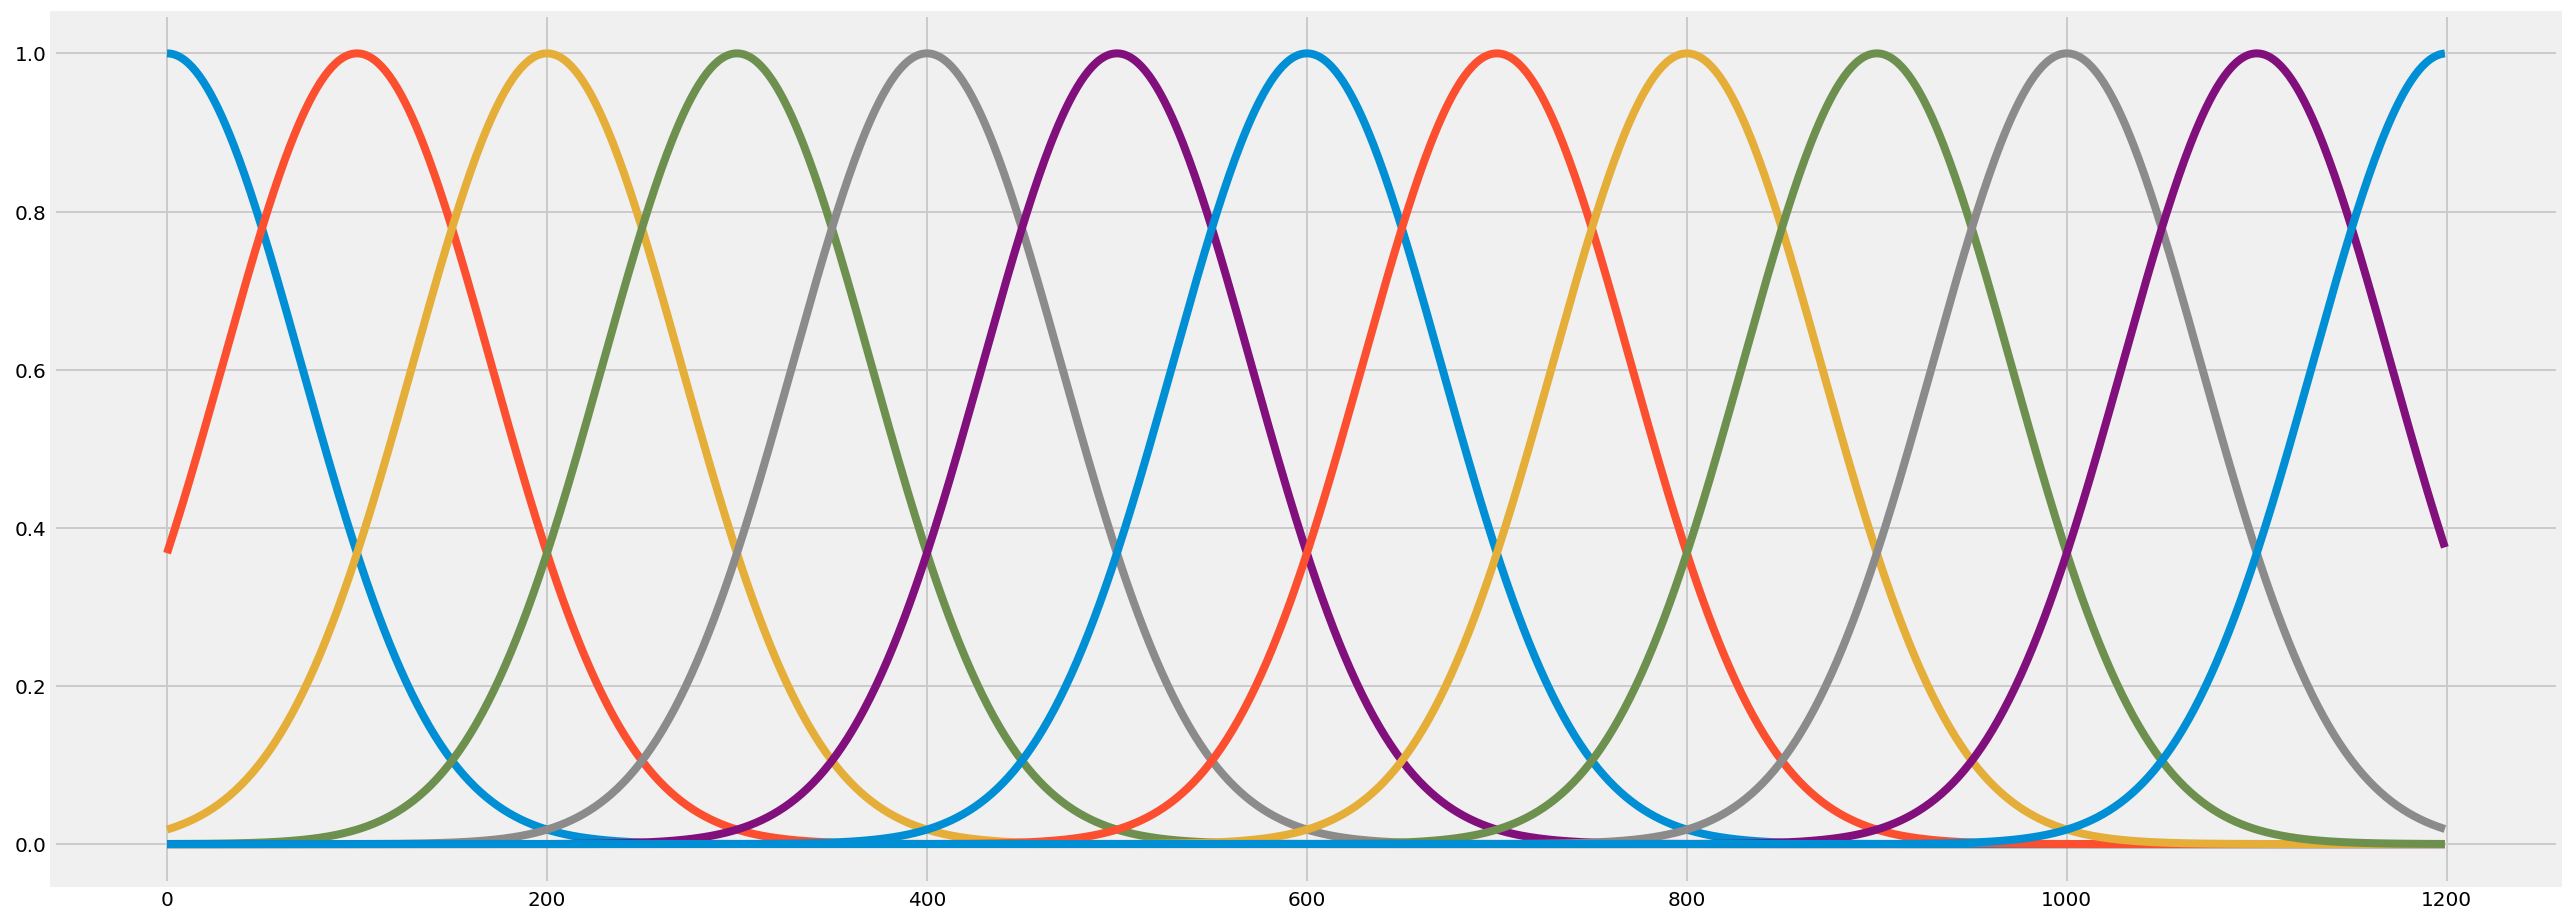

In [4]:
plt.figure(figsize=(20,8))
plt.plot(rbfs)
None

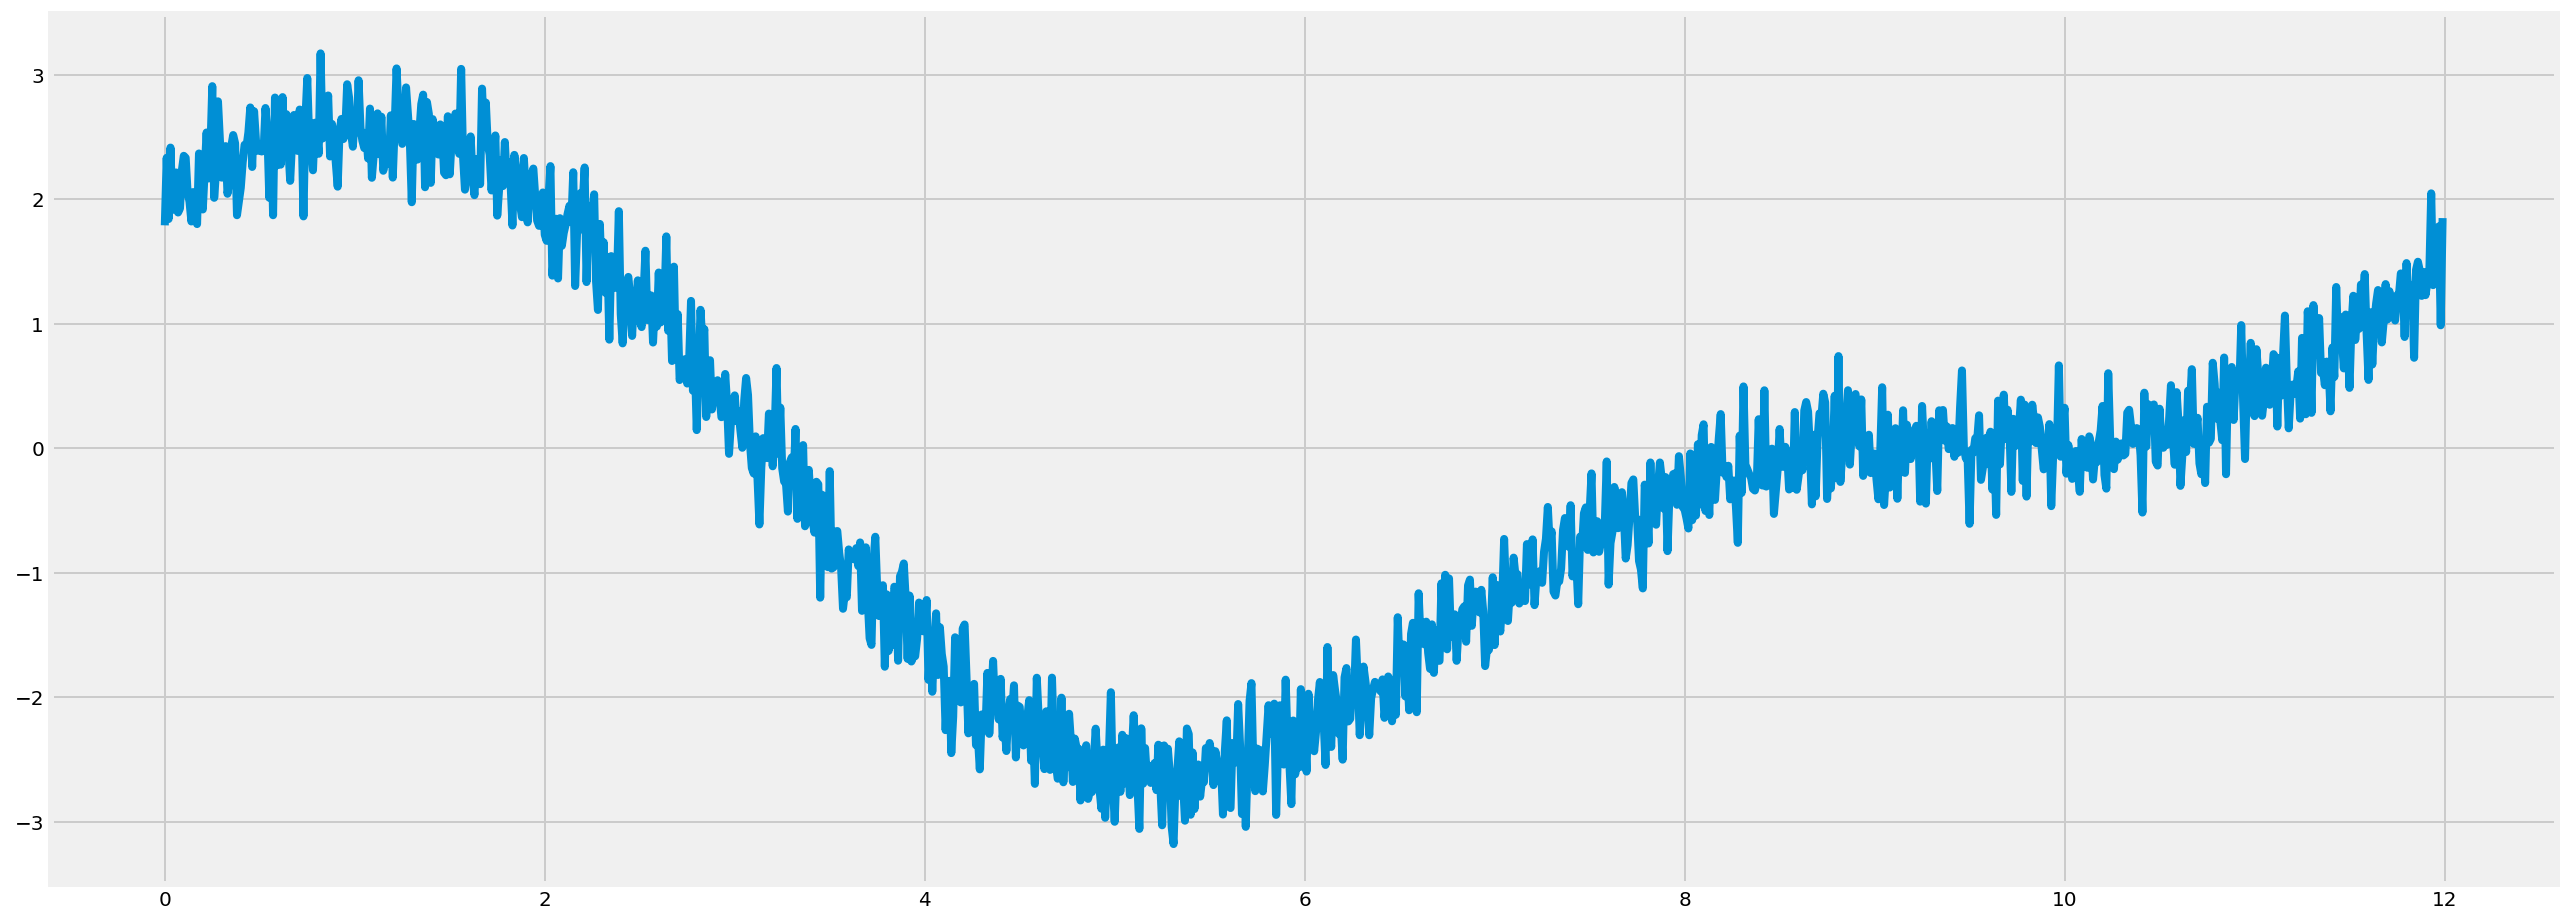

In [5]:
y = np.sin(x) + 2 * np.cos(x/2) + np.random.normal(size=len(x))/4
data['y'] = y
plt.figure(figsize=(20,8))
plt.plot(x,y)

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

train_dummy = data[['y', 'x_factored']]
dummy_vars_model = smf.ols(formula='y ~ x_factored', data=train_dummy)
dummy_vars_result = dummy_vars_model.fit()

train_rbfs = data.drop(['x', 'x_factored', 'y'], axis=1)
train_rbfs_vars = ' + '.join(train_rbfs.columns)
train_rbfs.columns
rbfs_model = smf.ols(formula='y ~ ' + train_rbfs_vars, data=train_rbfs)
rbfs_result = rbfs_model.fit()

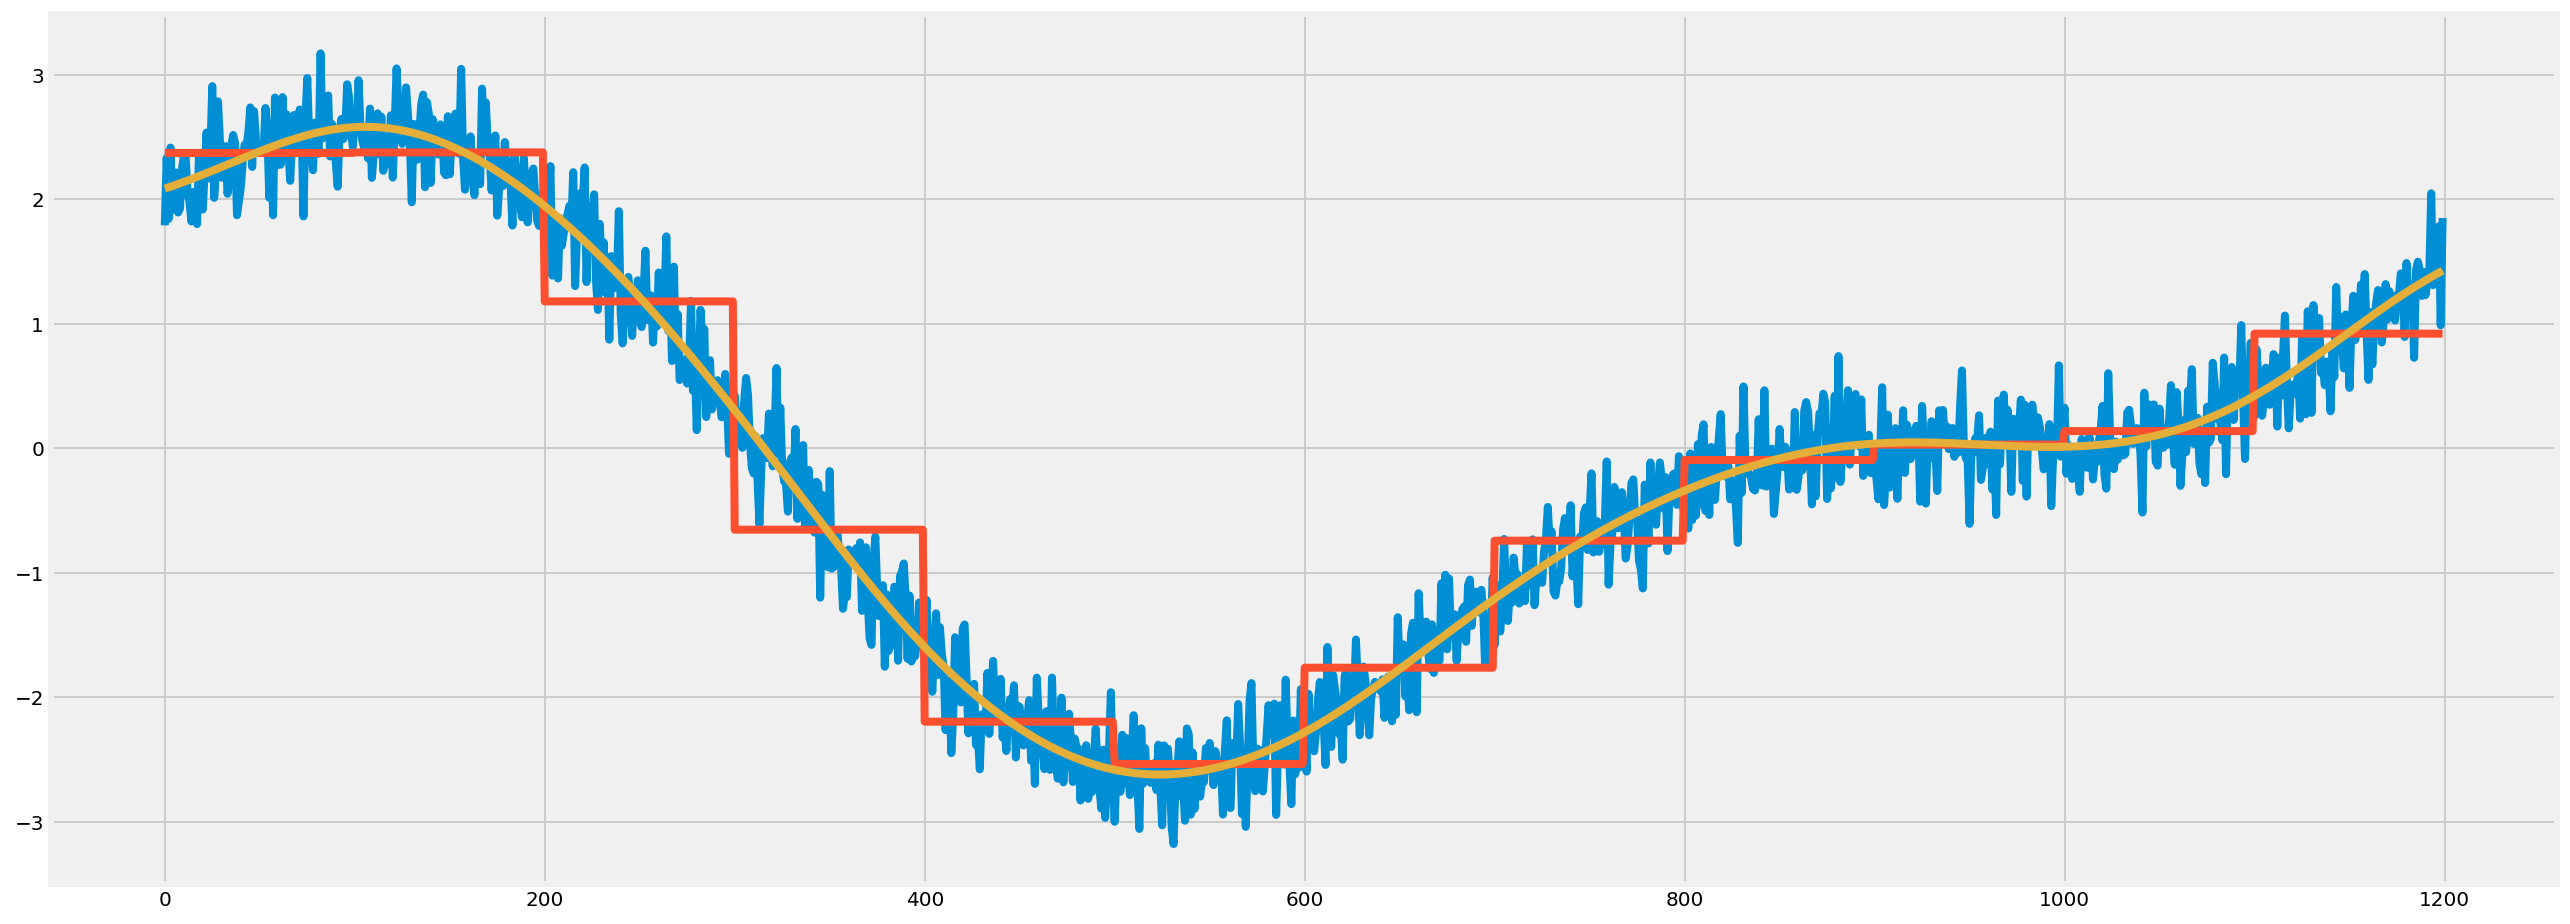

In [7]:
plt.figure(figsize=(20,8))
plt.plot(data['y'])
plt.plot(dummy_vars_result.predict(data))
plt.plot(rbfs_result.predict(data))